***NOTE : Separate file created so that only functions related to Gantt chart generation can be executed in colab except for the initial menu screen and various algorithm comparison functions***

In [ ]:
 from google.colab import files
uploaded = files.upload()

In [ ]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.animation import FuncAnimation
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fo

In [ ]:
algorithm_list = ["FCFS", "SJF", "SRTF", "RR", "PRIORITY", "PPRIORITY", "PRR"]
filename = input()
read_file = [filename + "_" + x + ".txt" for x in algorithm_list]

result_FCFS = pd.read_table(read_file[0], sep = " ")
#print(result_FCFS)
result_SJF = pd.read_table(read_file[1], sep = " ")
#print(result_SJF)
result_SRTF = pd.read_table(read_file[2], sep = " ")
#print(result_SRTF)
result_RR = pd.read_table(read_file[3], sep = " ")
#print(result_RR)
result_PRIORITY = pd.read_table(read_file[4], sep = " ")
#print(result_PRIORITY)
result_PPRIORITY = pd.read_table(read_file[5], sep = " ")
#print(result_PPRIORITY)
result_PRR = pd.read_table(read_file[6], sep = " ")
#print(result_PRR)

tc1


In [ ]:
process = result_FCFS["PROCESS"].unique()
nprocess = len(result_FCFS["PROCESS"].unique())
color = np.random.randint(0, 256, 3 * nprocess).reshape(nprocess, 3)

processcolor = {x: y for x, y in zip(process, color)}
#print(processcolor.get(result_SJF.iloc[0]["PROCESS"]))
#print(result_SJF.iloc[0])

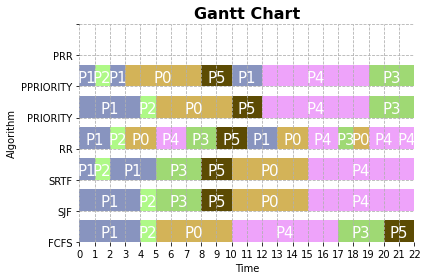

In [ ]:
fig, gnt = plt.subplots()

plt.rcParams['figure.figsize'] = (10,10)
plt.title("Gantt Chart", fontsize= 16, fontweight = 'bold')


gnt.set_xlabel("Time")
gnt.set_ylabel("Algorithm")
plt.xlim([0, result_FCFS.iloc[len(result_FCFS)-1]["E"]])
plt.ylim([0, 5*7])
plt.xticks(range(result_FCFS.iloc[len(result_FCFS)-1]["E"] + 1))
gnt.set_yticklabels(algorithm_list)
plt.box(False)

process = result_FCFS["PROCESS"].unique()
nprocess = len(result_FCFS["PROCESS"].unique())

color = np.random.randint(0, 256, 3 * nprocess).reshape(nprocess, 3)/255

processcolor = {x: y for x, y in zip(process, color)}

gnt.grid(True, linestyle='--')
width = 3.5
for i in range (0, len(result_FCFS)):
  #print([(result_FCFS.iloc[i]["S"], result_FCFS.iloc[i]["E"]), result_FCFS.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_FCFS.iloc[i]["S"], result_FCFS.iloc[i]["E"])], (0, width), facecolors = processcolor.get(result_FCFS.iloc[i]["PROCESS"]).tolist())
  #processcolor.get(result_FCFS.iloc[i]["PROCESS"])
  #print(result_FCFS.loc[i])
  gnt.annotate("%s"%(result_FCFS.iloc[i]["PROCESS"]), xy=((result_FCFS.iloc[i]["S"] + result_FCFS.iloc[i]["E"])/2, 0+5/2-1), ha='center', va='center', c = 'white', fontsize = 15)


for i in range (0, len(result_SJF)):
  #print([(result_SJF.iloc[i]["S"], result_SJF.iloc[i]["E"]), result_SJF.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_SJF.iloc[i]["S"], result_SJF.iloc[i]["E"])], (5, width), facecolors = processcolor.get(result_SJF.iloc[i]["PROCESS"]).tolist())
  gnt.annotate("%s"%(result_SJF.iloc[i]["PROCESS"]), xy=((result_SJF.iloc[i]["S"] + result_SJF.iloc[i]["E"])/2, 5+5/2-1), ha='center', va='center', c = 'white', fontsize = 15)

for i in range (0, len(result_SRTF)):
  #print([(result_SRTF.iloc[i]["S"], result_SRTF.iloc[i]["E"]), result_SRTF.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_SRTF.iloc[i]["S"], result_SRTF.iloc[i]["E"])], (10, width), facecolors = processcolor.get(result_SRTF.iloc[i]["PROCESS"]).tolist())
  gnt.annotate("%s"%(result_SRTF.iloc[i]["PROCESS"]), xy=((result_SRTF.iloc[i]["S"] + result_SRTF.iloc[i]["E"])/2, 10+5/2-1), ha='center', va='center', c = 'white', fontsize = 15)

for i in range (0, len(result_RR)):
  #print([(result_RR.iloc[i]["S"], result_RR.iloc[i]["E"]), result_RR.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_RR.iloc[i]["S"], result_RR.iloc[i]["E"])], (15, width), facecolors = processcolor.get(result_RR.iloc[i]["PROCESS"]).tolist())
  gnt.annotate("%s"%(result_RR.iloc[i]["PROCESS"]), xy=((result_RR.iloc[i]["S"] + result_RR.iloc[i]["E"])/2, 15+5/2-1), ha='center', va='center', c = 'white', fontsize = 15)

for i in range (0, len(result_PRIORITY)):
  #print([(result_PRIORITY.iloc[i]["S"], result_PRIORITY.iloc[i]["E"]), result_PRIORITY.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_PRIORITY.iloc[i]["S"], result_PRIORITY.iloc[i]["E"])], (20, width), facecolors = processcolor.get(result_PRIORITY.iloc[i]["PROCESS"]).tolist())
  gnt.annotate("%s"%(result_PRIORITY.iloc[i]["PROCESS"]), xy=((result_PRIORITY.iloc[i]["S"] + result_PRIORITY.iloc[i]["E"])/2, 20+5/2-1), ha='center', va='center', c = 'white', fontsize = 15)

for i in range (0, len(result_PPRIORITY)):
  #print([(result_PPRIORITY.iloc[i]["S"], result_PPRIORITY.iloc[i]["E"]), result_PPRIORITY.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_PPRIORITY.iloc[i]["S"], result_PPRIORITY.iloc[i]["E"])], (25, width), facecolors = processcolor.get(result_PPRIORITY.iloc[i]["PROCESS"]).tolist())
  gnt.annotate("%s"%(result_PPRIORITY.iloc[i]["PROCESS"]), xy=((result_PPRIORITY.iloc[i]["S"] + result_PPRIORITY.iloc[i]["E"])/2, 25+5/2-1), ha='center', va='center', c = 'white', fontsize = 15)

for i in range (0, len(result_PRR)):
  #print([(result_PRR.iloc[i]["S"], result_PRR.iloc[i]["E"]), result_PRR.iloc[i]["PROCESS"]])
  gnt.broken_barh([(result_PRR.iloc[i]["S"], result_PRR.iloc[i]["E"])], (30, width), facecolors = processcolor.get(result_PRR.iloc[i]["PROCESS"]).tolist())
  gnt.annotate("%s"%(result_PRR.iloc[i]["PROCESS"]), xy=((result_PRR.iloc[i]["S"] + result_PRR.iloc[i]["E"])/2, 30+5/2-1), ha='center', va='center', c = 'white', fontsize = 15)

plt.savefig(filename+"_GanttChart.png")

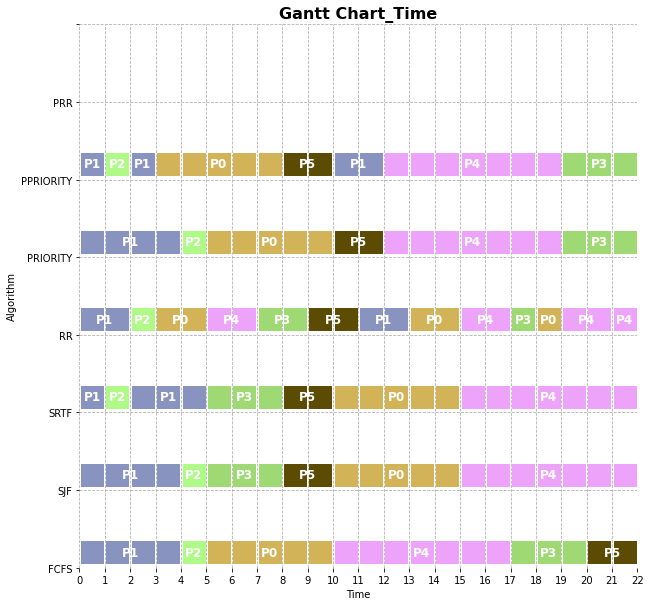

In [ ]:
timeslice = 5/result_FCFS.iloc[len(result_FCFS)-1]["E"]
fig, gnt = plt.subplots()

plt.rcParams['figure.figsize'] = (10,10)
plt.title("Gantt Chart_Time", fontsize= 16, fontweight = 'bold')

gnt.set_xlabel("Time")
gnt.set_ylabel("Algorithm")
plt.xlim([0, result_FCFS.iloc[len(result_FCFS)-1]["E"]])
plt.ylim([0, 5*7])
plt.xticks(range(result_FCFS.iloc[len(result_FCFS)-1]["E"] + 1))
gnt.set_yticklabels(algorithm_list)
plt.box(False)
gnt.grid(True, linestyle='--')
width = 3.5

x, y = [], []
line, = plt.plot([], [], 'bo')

for i in range (0, len(result_FCFS)):
  gnt.annotate("%s"%(result_FCFS.iloc[i]["PROCESS"]), xy=((result_FCFS.iloc[i]["S"] + result_FCFS.iloc[i]["E"])/2, 0+5/2-1.5), ha='center', va='center', c = 'white', fontsize = 12, fontweight='bold')

for i in range (0, len(result_SJF)):
  gnt.annotate("%s"%(result_SJF.iloc[i]["PROCESS"]), xy=((result_SJF.iloc[i]["S"] + result_SJF.iloc[i]["E"])/2, 5+5/2-1.5), ha='center', va='center', c = 'white', fontsize = 12, fontweight='bold')

for i in range (0, len(result_SRTF)):
  gnt.annotate("%s"%(result_SRTF.iloc[i]["PROCESS"]), xy=((result_SRTF.iloc[i]["S"] + result_SRTF.iloc[i]["E"])/2, 10+5/2-1.5), ha='center', va='center', c = 'white', fontsize = 12, fontweight='bold')

for i in range (0, len(result_RR)):
  gnt.annotate("%s"%(result_RR.iloc[i]["PROCESS"]), xy=((result_RR.iloc[i]["S"] + result_RR.iloc[i]["E"])/2, 15+5/2-1.5), ha='center', va='center', c = 'white', fontsize = 12, fontweight='bold')

for i in range (0, len(result_PRIORITY)):
  gnt.annotate("%s"%(result_PRIORITY.iloc[i]["PROCESS"]), xy=((result_PRIORITY.iloc[i]["S"] + result_PRIORITY.iloc[i]["E"])/2, 20+5/2-1.5), ha='center', va='center', c = 'white', fontsize = 12, fontweight='bold')

for i in range (0, len(result_PPRIORITY)):
  gnt.annotate("%s"%(result_PPRIORITY.iloc[i]["PROCESS"]), xy=((result_PPRIORITY.iloc[i]["S"] + result_PPRIORITY.iloc[i]["E"])/2, 25+5/2-1.5), ha='center', va='center', c = 'white', fontsize = 12, fontweight='bold')

for i in range (0, len(result_PRR)):
  gnt.annotate("%s"%(result_PRR.iloc[i]["PROCESS"]), xy=((result_PRR.iloc[i]["S"] + result_PRR.iloc[i]["E"])/2, 30+5/2-1.5), ha='center', va='center', c = 'white', fontsize = 12, fontweight='bold')

def animate(t):
#["FCFS", "SJF", "SRTF", "RR", "PRIORITY", "PPRIORITY", "PRR"]
  x = t+0.5
  y = 1
  index = 0
  for i in range (0, t):
    if result_FCFS.iloc[index]["E"] == i+1:
      index+=1 
  plt.scatter(x,y, marker = 's', color = processcolor.get(result_FCFS.iloc[index]["PROCESS"]).tolist(),s=500)
  x = t+0.5
  y = 6
  index = 0
  for i in range (0, t):
    if result_SJF.iloc[index]["E"] == i+1:
      index+=1 
  plt.scatter(x,y, marker = 's', color = processcolor.get(result_SJF.iloc[index]["PROCESS"]).tolist(),s=500)
  x = t+0.5
  y = 11
  index = 0
  for i in range (0, t):
    if result_SRTF.iloc[index]["E"] == i+1:
      index+=1 
  plt.scatter(x,y, marker = 's', color = processcolor.get(result_SRTF.iloc[index]["PROCESS"]).tolist(),s=500)
  x = t+0.5
  y = 16
  index = 0
  for i in range (0, t):
    if result_RR.iloc[index]["E"] == i+1:
      index+=1 
  plt.scatter(x,y, marker = 's', color = processcolor.get(result_RR.iloc[index]["PROCESS"]).tolist(),s=500)
  x = t+0.5
  y = 21
  index = 0
  for i in range (0, t):
    if result_PRIORITY.iloc[index]["E"] == i+1:
      index+=1 
  plt.scatter(x,y, marker = 's', color = processcolor.get(result_PRIORITY.iloc[index]["PROCESS"]).tolist(),s=500)
  x = t+0.5
  y = 26
  index = 0
  for i in range (0, t):
    if result_PPRIORITY.iloc[index]["E"] == i+1:
      index+=1 
  plt.scatter(x,y, marker = 's', color = processcolor.get(result_PPRIORITY.iloc[index]["PROCESS"]).tolist(),s=500)
  x = t+0.5
  y = 31
  """
  index = 0
  for i in range (0, t):
    if result_PRR.iloc[index]["E"] == i+1:
      index+=1 
  plt.scatter(x,y, marker = 's', color = processcolor.get(result_PRR.iloc[index]["PROCESS"]).tolist(),s=500)
  """



timeslice = 100/result_FCFS.iloc[len(result_FCFS)-1]["E"]
ani = FuncAnimation(fig=fig, func=animate, frames = np.arange(result_FCFS.iloc[len(result_FCFS)-1]["E"]), interval=timeslice, repeat = False)
animationsave = filename + "_" + "GanttChartAnimation.gif"
ani.save(animationsave, writer='imagemagick')
